In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # plot patchwork
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(cowplot))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(ggplotify))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(grid))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(RcppTOML))) # parsing config file



source("../../utils/figure_themes.r")

## single cell predictions 

In [2]:
CELL_TYPE = "PBMC"

In [3]:
# define main_df_path
main_df_path = paste0("../results/", CELL_TYPE, "/","single_cell_predictions.parquet")

# read in data
main_df = arrow::read_parquet(main_df_path)
unique(main_df$comparison)

[1] "control_pyroptosis"   "apoptosis_control"    "apoptosis_pyroptosis"

In [4]:
# split the df by comparison
control <- main_df %>% filter(group == "Control")    
apoptosis <- main_df %>% filter(group == "Apoptosis")
pyroptosis <- main_df %>% filter(group == "Pyroptosis")
length((control$group))
length((apoptosis$group))
length((pyroptosis$group))

[1] 16

[1] 17

[1] 15

In [5]:
width <- 2
height <- 2
options(repr.plot.width = width, repr.plot.height = height)
# define function to return the image object
get_image <- function(df, i){
    # Load the PNG file
    img <- png::readPNG(df$image_compsite_crop_path[i])
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()  # Remove axes and labels

    # Print the plot
    return(p)
}


#add titlecontrol_pyroptosis
add_title <- function(plot, title){
    plot + ggtitle(title) + theme(plot.title = element_text(size = 14, hjust = 0.5))
}

load_image <- function(path){
    img <- png::readPNG(path)
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()
    return(p)
}


In [6]:
# split the feature column into separate columns
control <- control %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
control$channel_learned <- dplyr::recode(control$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )
# split the feature column into separate columns
apoptosis <- apoptosis %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
apoptosis$channel_learned <- dplyr::recode(apoptosis$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )


# split the feature column into separate columns
pyroptosis <- pyroptosis %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
pyroptosis$channel_learned <- dplyr::recode(pyroptosis$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )

print(dim(control))
print(dim(apoptosis))
print(dim(pyroptosis))

[1] 16 36
[1] 17 36
[1] 15 36


### Pyroptosis vs Control features

In [7]:
# select rows to keep in the df by index
# rows_to_keep = c(1,8,15)
# control = control[rows_to_keep,]

[1] 16

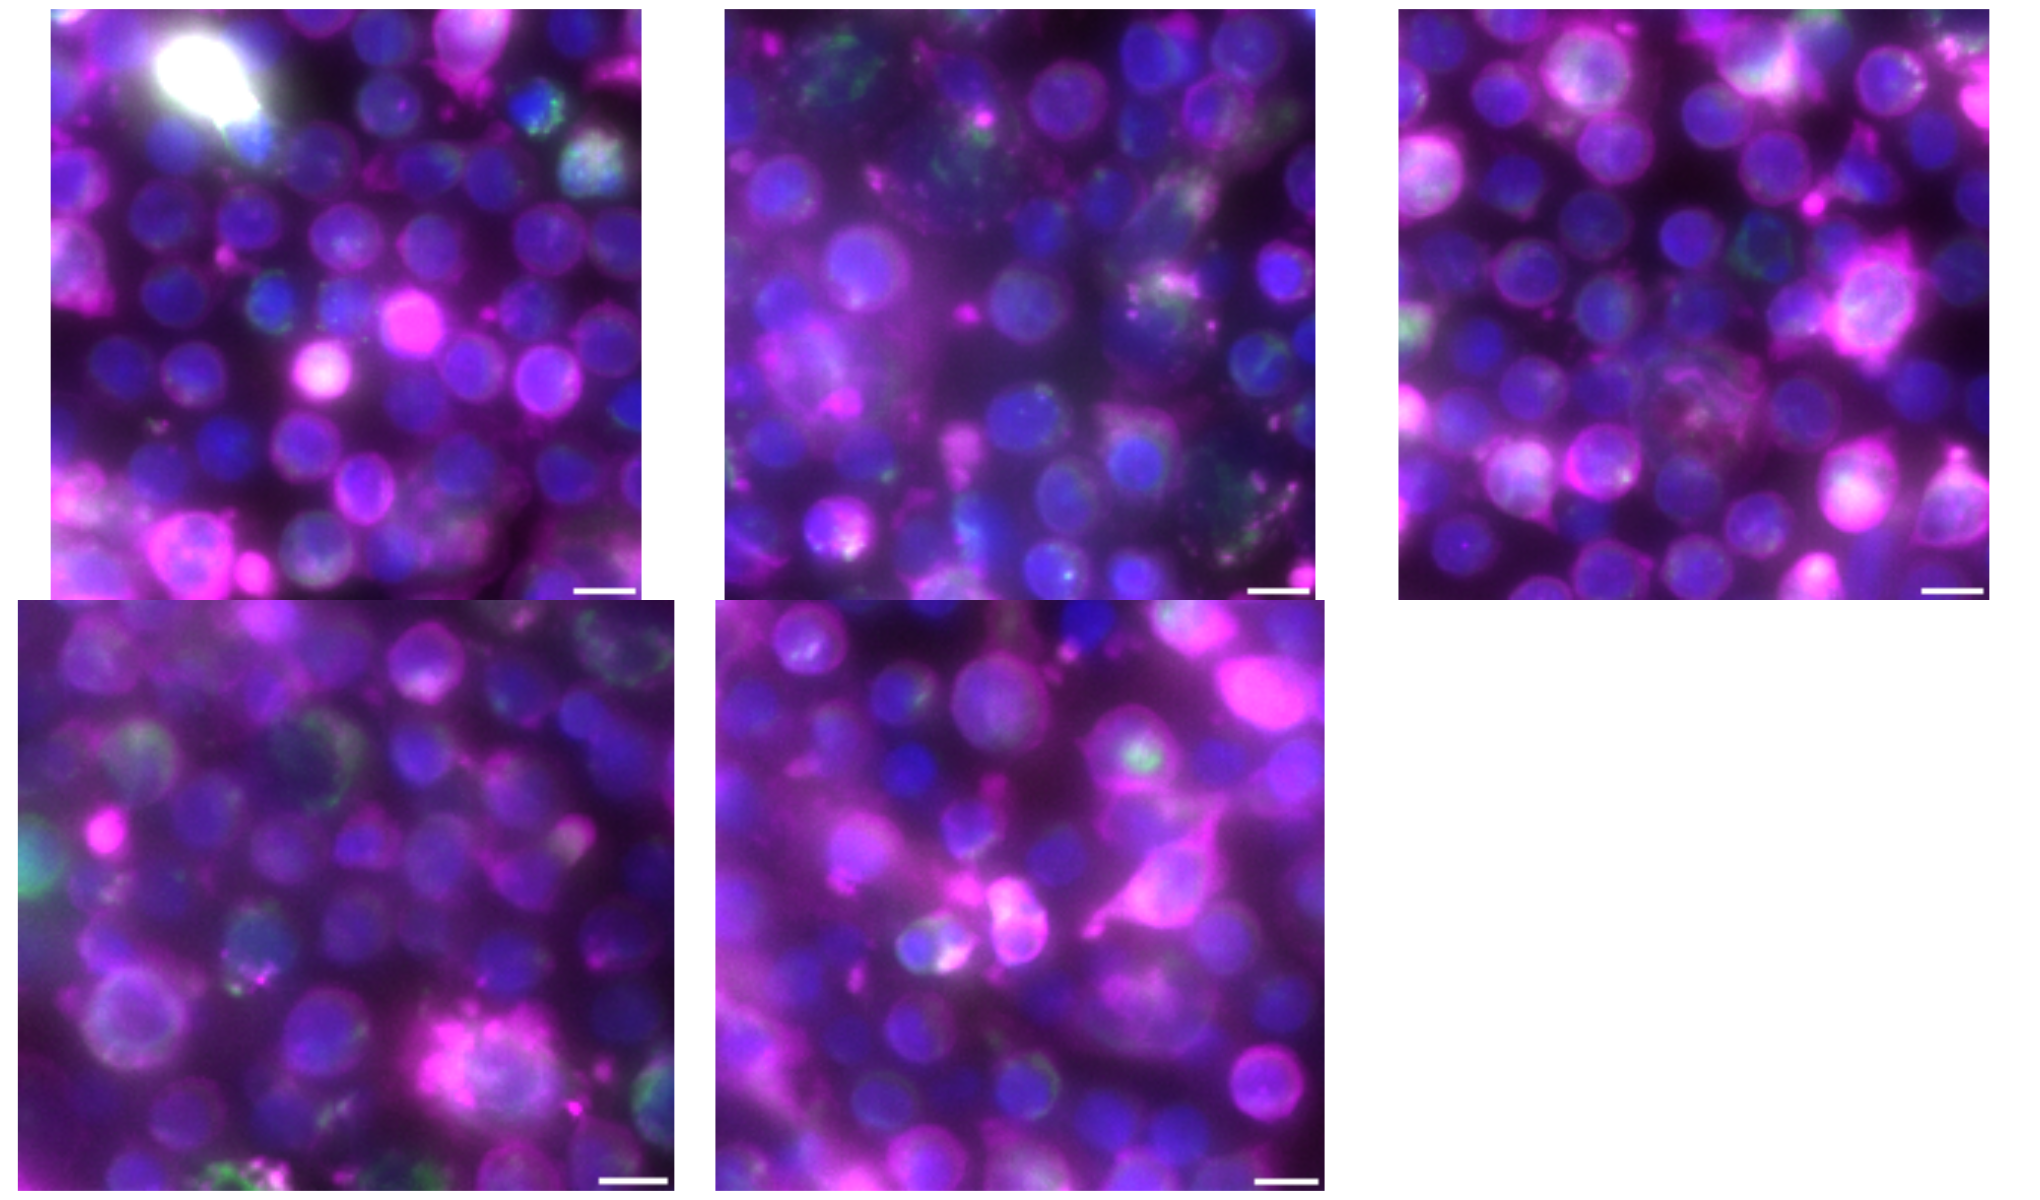

In [8]:
# loop through the rows of the df and plot the images
list_of_plots_control_plot <- c()
for (i in 1:nrow(control)){
    list_of_plots_control_plot[[i]] <- get_image(control, i)
}

# get the subtitle from each item in the list
ggplot_objects_control <- Map(
    add_title,
    plot = list_of_plots_control_plot,
    title = (
        paste0(control$comparison, "\n", 
        control$group, "\n", 
        control$compartment, "\n",
        control$feature_group, "\n",
        control$measurement, "\n",
        control$channel_cleaned
        
        )))
length(ggplot_objects_control)
width <- 17
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
# stich the images together
control_images <- (
    # plot image with 
    list_of_plots_control_plot[[1]]
    + list_of_plots_control_plot[[2]]
    + list_of_plots_control_plot[[3]]
    + list_of_plots_control_plot[[4]]
    + list_of_plots_control_plot[[5]]
   
    + plot_layout(ncol = 3)
)
control_images

### Apoptosis

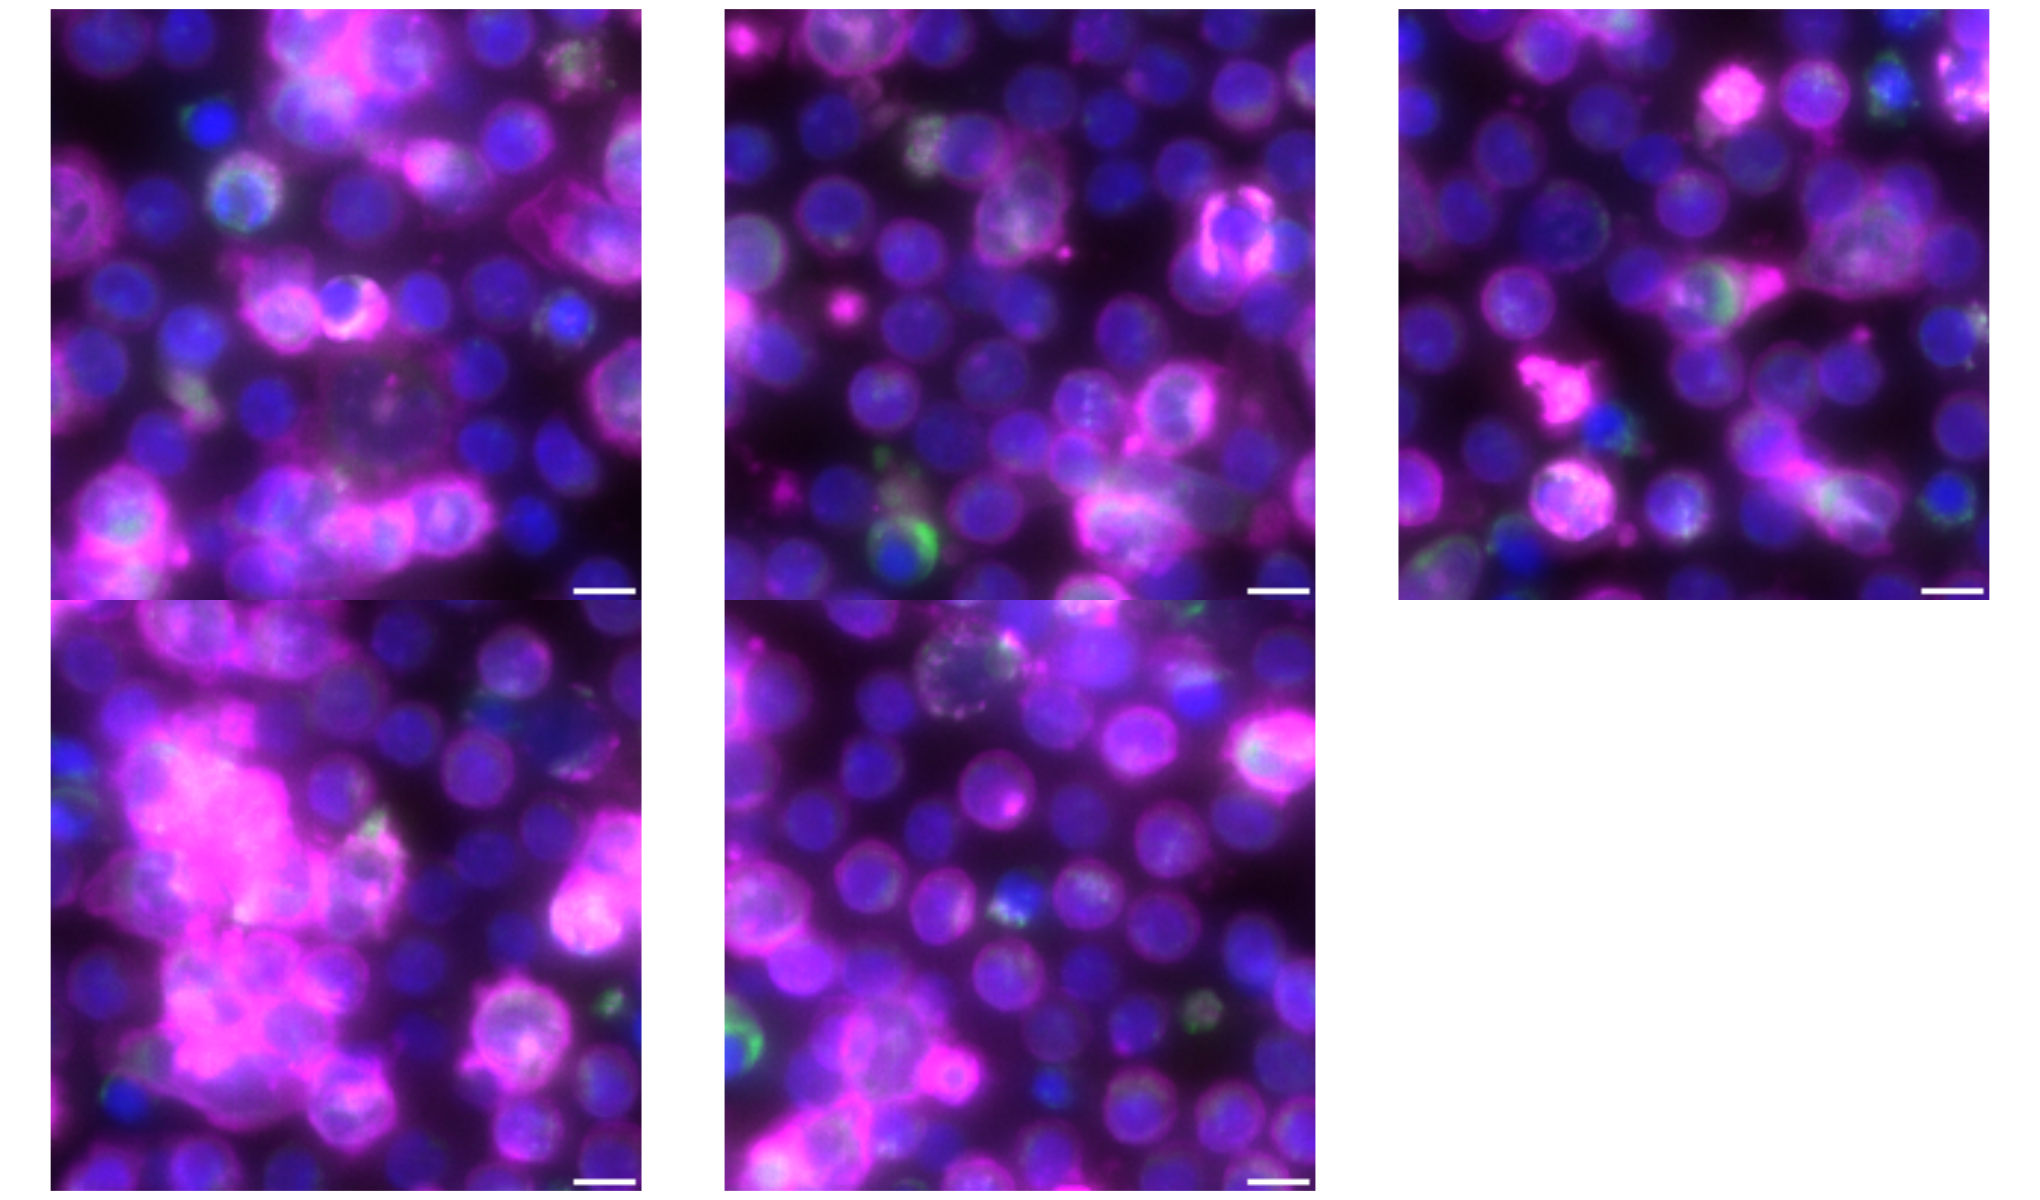

In [9]:
# loop through the rows of the df and plot the images
list_of_plots_apoptosis <- c()
for (i in 1:nrow(apoptosis)){
    list_of_plots_apoptosis[[i]] <- get_image(apoptosis, i)
}

# get the subtitle from each item in the list
apoptosis_list <- Map(
    add_title,
    plot = list_of_plots_apoptosis,
    title = (
        paste0(apoptosis$comparison, "\n", 
        apoptosis$group, "\n", 
        apoptosis$compartment, "\n",
        apoptosis$feature_group, "\n",
        apoptosis$measurement        
        )))
width <- 17
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
# stich the images together
apoptosis_images <- (
    # plot image with 
    list_of_plots_apoptosis[[1]]
    + list_of_plots_apoptosis[[2]]
    + list_of_plots_apoptosis[[3]]
    + list_of_plots_apoptosis[[4]]
    + list_of_plots_apoptosis[[5]]
   
    + plot_layout(ncol = 3)
)
apoptosis_images

### Apoptosis vs Pyroptosis features

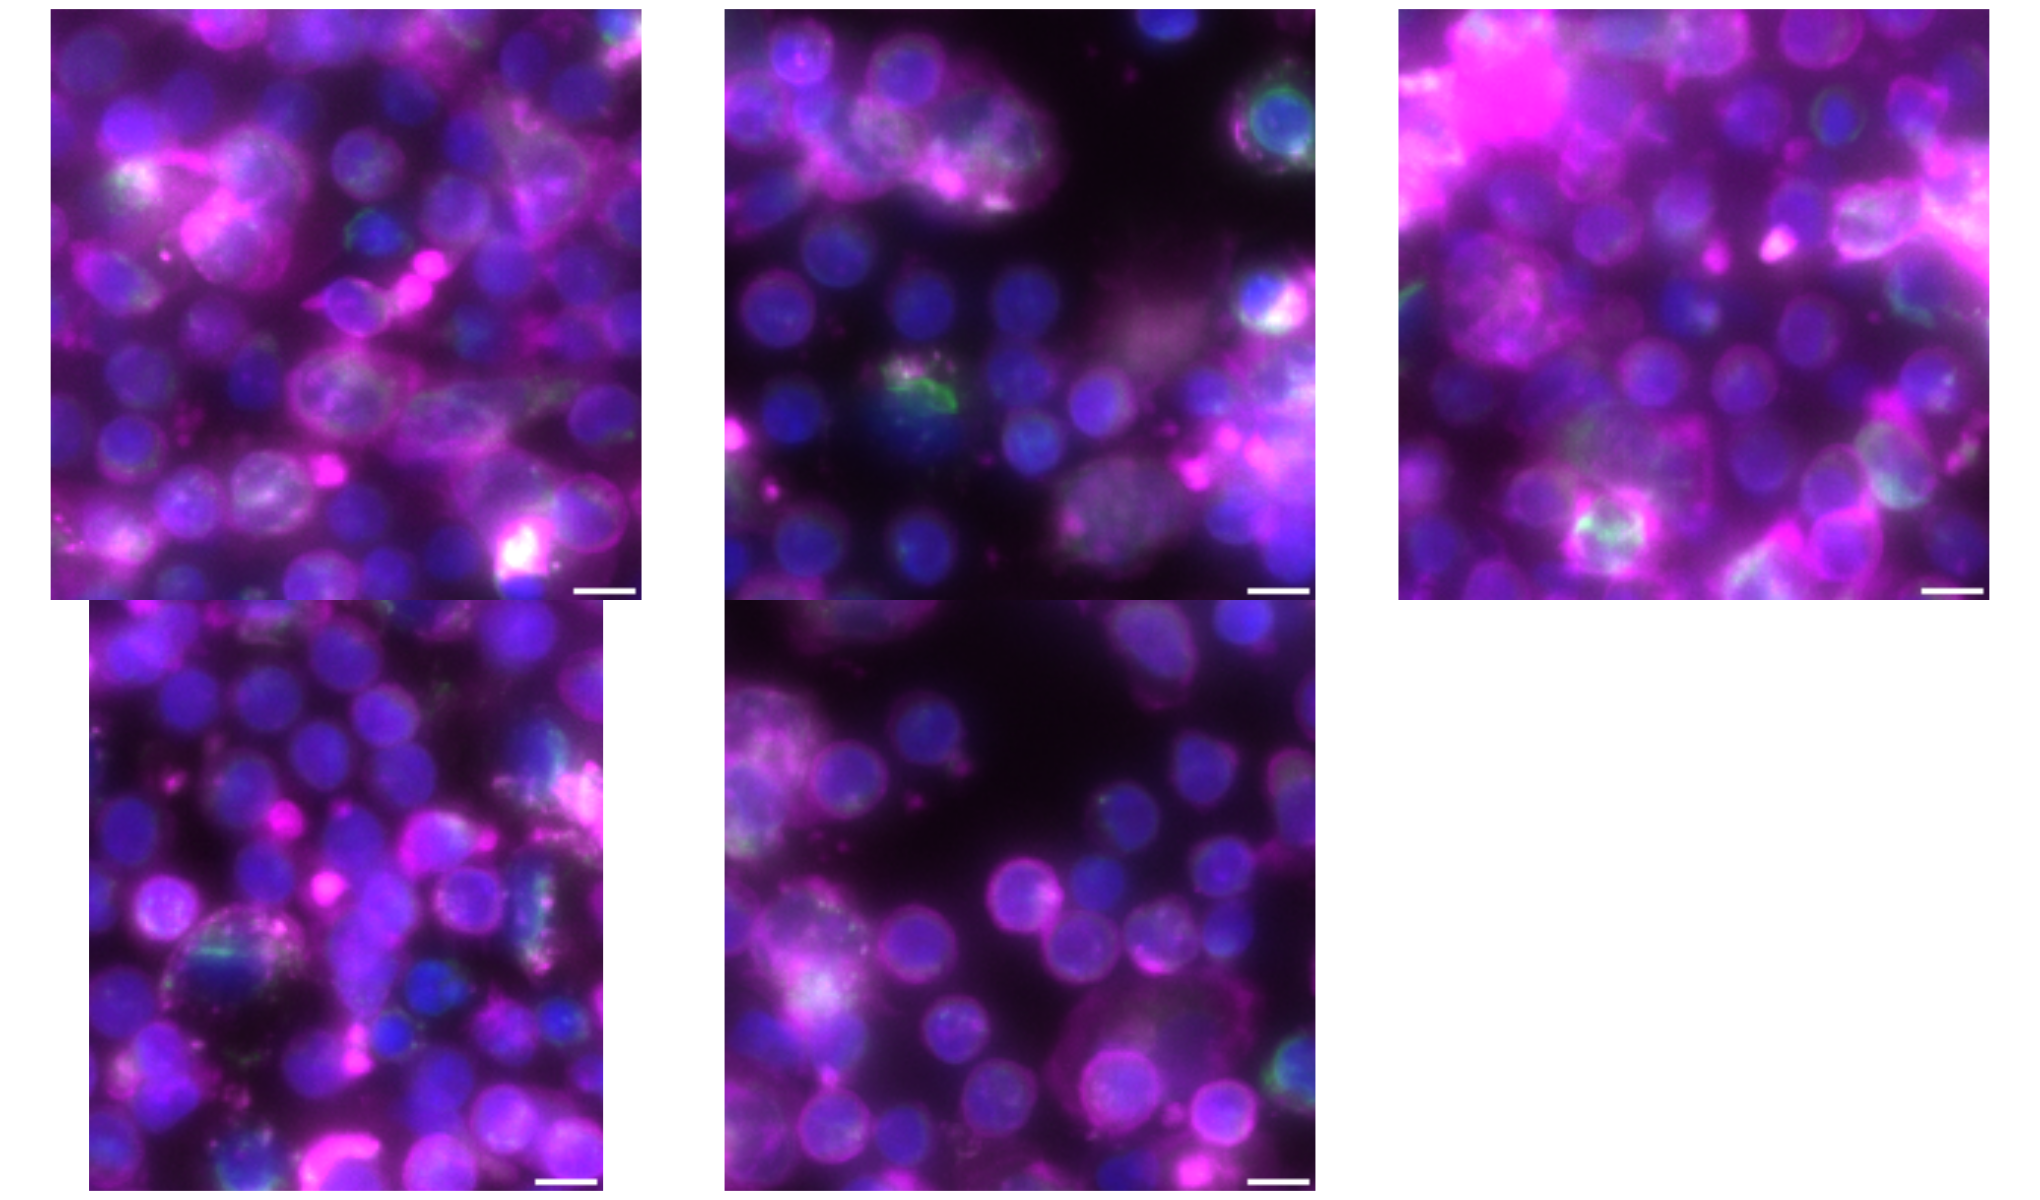

In [10]:
list_of_plots_pyroptosis <- c()
for (i in 1:nrow(pyroptosis)){
    list_of_plots_pyroptosis[[i]] <- get_image(pyroptosis, i)
}

# get the subtitle from each item in the list
ggplot_objects_pyroptosis <- Map(
    add_title,
    plot = list_of_plots_pyroptosis,
    title = (
        paste0(pyroptosis$comparison, "\n", 
        pyroptosis$group, "\n", 
        pyroptosis$compartment, "\n",
        pyroptosis$feature_group, "\n",
        pyroptosis$measurement, "\n",
        pyroptosis$channel_cleaned
        
        )))

width <- 17
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
# stich the images together
pyroptosis_images <- (
    # plot image with 
    list_of_plots_pyroptosis[[1]]
    + list_of_plots_pyroptosis[[2]]
    + list_of_plots_pyroptosis[[3]]
    + list_of_plots_pyroptosis[[4]]
    + list_of_plots_pyroptosis[[5]]
   
    + plot_layout(ncol = 3)
)
pyroptosis_images

In [11]:
control_index <- 2
apoptosis_index <- 1
pyroptosis_index <- 4
# get the subset
control_subset <- control[control_index,]
apoptosis_subset <- apoptosis[apoptosis_index,]
pyroptosis_subset <- pyroptosis[pyroptosis_index,]

Single channel + composite montage apooptosis vs pyroptosis


In [12]:
control_dapi_image_path <- control$image_DAPI_crop_path[1]
control_er_path <- control$image_ER_crop_path[1]
control_gasdermin_path <- control$image_GasderminD_crop_path[1]
control_pm_path <- control$image_AGP_crop_path[1]
control_mito_path <- control$image_Mitochondria_crop_path[1]
control_composite_path <- control$image_compsite_crop_path[1]

apoptosis_dapi_image_path <- apoptosis$image_DAPI_crop_path[2]
apoptosis_er_path <- apoptosis$image_ER_crop_path[2]
apoptosis_gasdermin_path <- apoptosis$image_GasderminD_crop_path[2]
apoptosis_pm_path <- apoptosis$image_AGP_crop_path[2]
apoptosis_mito_path <- apoptosis$image_Mitochondria_crop_path[2]
apoptosis_composite_path <- apoptosis$image_compsite_crop_path[2]

pyroptosis_dapi_image_path <- pyroptosis$image_DAPI_crop_path[3]
pyroptosis_er_path <- pyroptosis$image_ER_crop_path[3]
pyroptosis_gasdermin_path <- pyroptosis$image_GasderminD_crop_path[3]
pyroptosis_pm_path <- pyroptosis$image_AGP_crop_path[3]
pyroptosis_mito_path <- pyroptosis$image_Mitochondria_crop_path[3]
pyroptosis_composite_path <- pyroptosis$image_compsite_crop_path[3]

# load images 
control_dapi_image <- load_image(control_dapi_image_path)
control_er_image <- load_image(control_er_path)
control_gasdermin_image <- load_image(control_gasdermin_path)
control_pm_image <- load_image(control_pm_path)
control_mito_image <- load_image(control_mito_path)

apoptosis_dapi_image <- load_image(apoptosis_dapi_image_path)
apoptosis_er_image <- load_image(apoptosis_er_path)
apoptosis_gasdermin_image <- load_image(apoptosis_gasdermin_path)
apoptosis_pm_image <- load_image(apoptosis_pm_path)
apoptosis_mito_image <- load_image(apoptosis_mito_path)

pyroptosis_dapi_image <- load_image(pyroptosis_dapi_image_path)
pyroptosis_er_image <- load_image(pyroptosis_er_path)
pyroptosis_gasdermin_image <- load_image(pyroptosis_gasdermin_path)
pyroptosis_pm_image <- load_image(pyroptosis_pm_path)
pyroptosis_mito_image <- load_image(pyroptosis_mito_path)

control_composite_image <- load_image(control_composite_path)
apoptosis_composite_image <- load_image(apoptosis_composite_path)
pyroptosis_composite_image <- load_image(pyroptosis_composite_path)

# list of images
list_of_images <- list(
    control_dapi_image,
    control_er_image,
    control_gasdermin_image,
    control_pm_image,
    control_mito_image,
    control_composite_image,


    apoptosis_dapi_image,
    apoptosis_er_image,
    apoptosis_gasdermin_image,
    apoptosis_pm_image,
    apoptosis_mito_image,
    apoptosis_composite_image,

    pyroptosis_dapi_image,
    pyroptosis_er_image,
    pyroptosis_gasdermin_image,
    pyroptosis_pm_image,
    pyroptosis_mito_image,
    pyroptosis_composite_image
)



In [13]:
width <- 2.5
height <- 2.5

text_size <- 12

options(repr.plot.width = width, repr.plot.height = height)

# blank
blank <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = ""), size = text_size) 
    + theme_void()
)

# ggplot of just text
control_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Control"), size = text_size) 
    + theme_void()
)
apoptosis_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Apoptosis"), size = text_size) 
    + theme_void()
)
pyroptosis_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Pyroptosis"), size = text_size) 
    + theme_void()
)

In [14]:
# patchwork the images together
width <- 17
height <- 5

options(repr.plot.width = width, repr.plot.height = height)

# stich the images together
control_images <- (
    # plot image with 
    control_text
    + list_of_images[[1]]
    + list_of_images[[2]]
    + list_of_images[[3]]
    + list_of_images[[4]]
    + list_of_images[[5]]
    + list_of_images[[6]]
    + plot_layout(nrow = 1)
)
apotosis_images <- (
    # plot image with 
    apoptosis_text
    + list_of_images[[7]]
    + list_of_images[[8]]
    + list_of_images[[9]]
    + list_of_images[[10]]
    + list_of_images[[11]]
    + list_of_images[[12]]
    + plot_layout(nrow = 1)
)
pyroptosis_images <- (
    # plot image with 
    pyroptosis_text
    + list_of_images[[13]]
    + list_of_images[[14]]
    + list_of_images[[15]]
    + list_of_images[[16]]
    + list_of_images[[17]]
    + list_of_images[[18]]
    + plot_layout(nrow = 1)
)




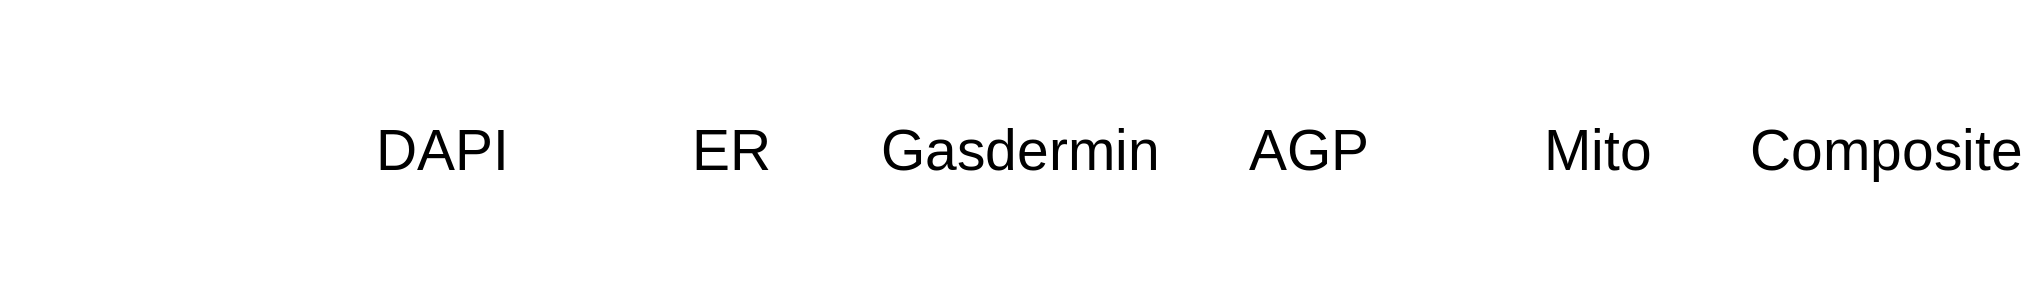

In [15]:
width <- 2.5
height <- 2.5

text_size <- 12

options(repr.plot.width = width, repr.plot.height = height)

# ggplot of just text
dapi_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "DAPI"), size = text_size) 
    + theme_void()
)
er_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "ER"), size = text_size) 
    + theme_void()
)
Gasdermin_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Gasdermin"), size = text_size) 
    + theme_void()
)
pm_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "AGP"), size = text_size) 
    + theme_void()
)
mito_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Mito"), size = text_size) 
    + theme_void()
)
composite_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Composite"), size = text_size) 
    + theme_void()
)


# patch text together
patch_text <- (
    blank
    + dapi_text
    + er_text
    + Gasdermin_text
    + pm_text
    + mito_text
    + composite_text
    + plot_layout(nrow = 1)
)
width <- 17
height <- 2.5

options(repr.plot.width = width, repr.plot.height = height)


patch_text

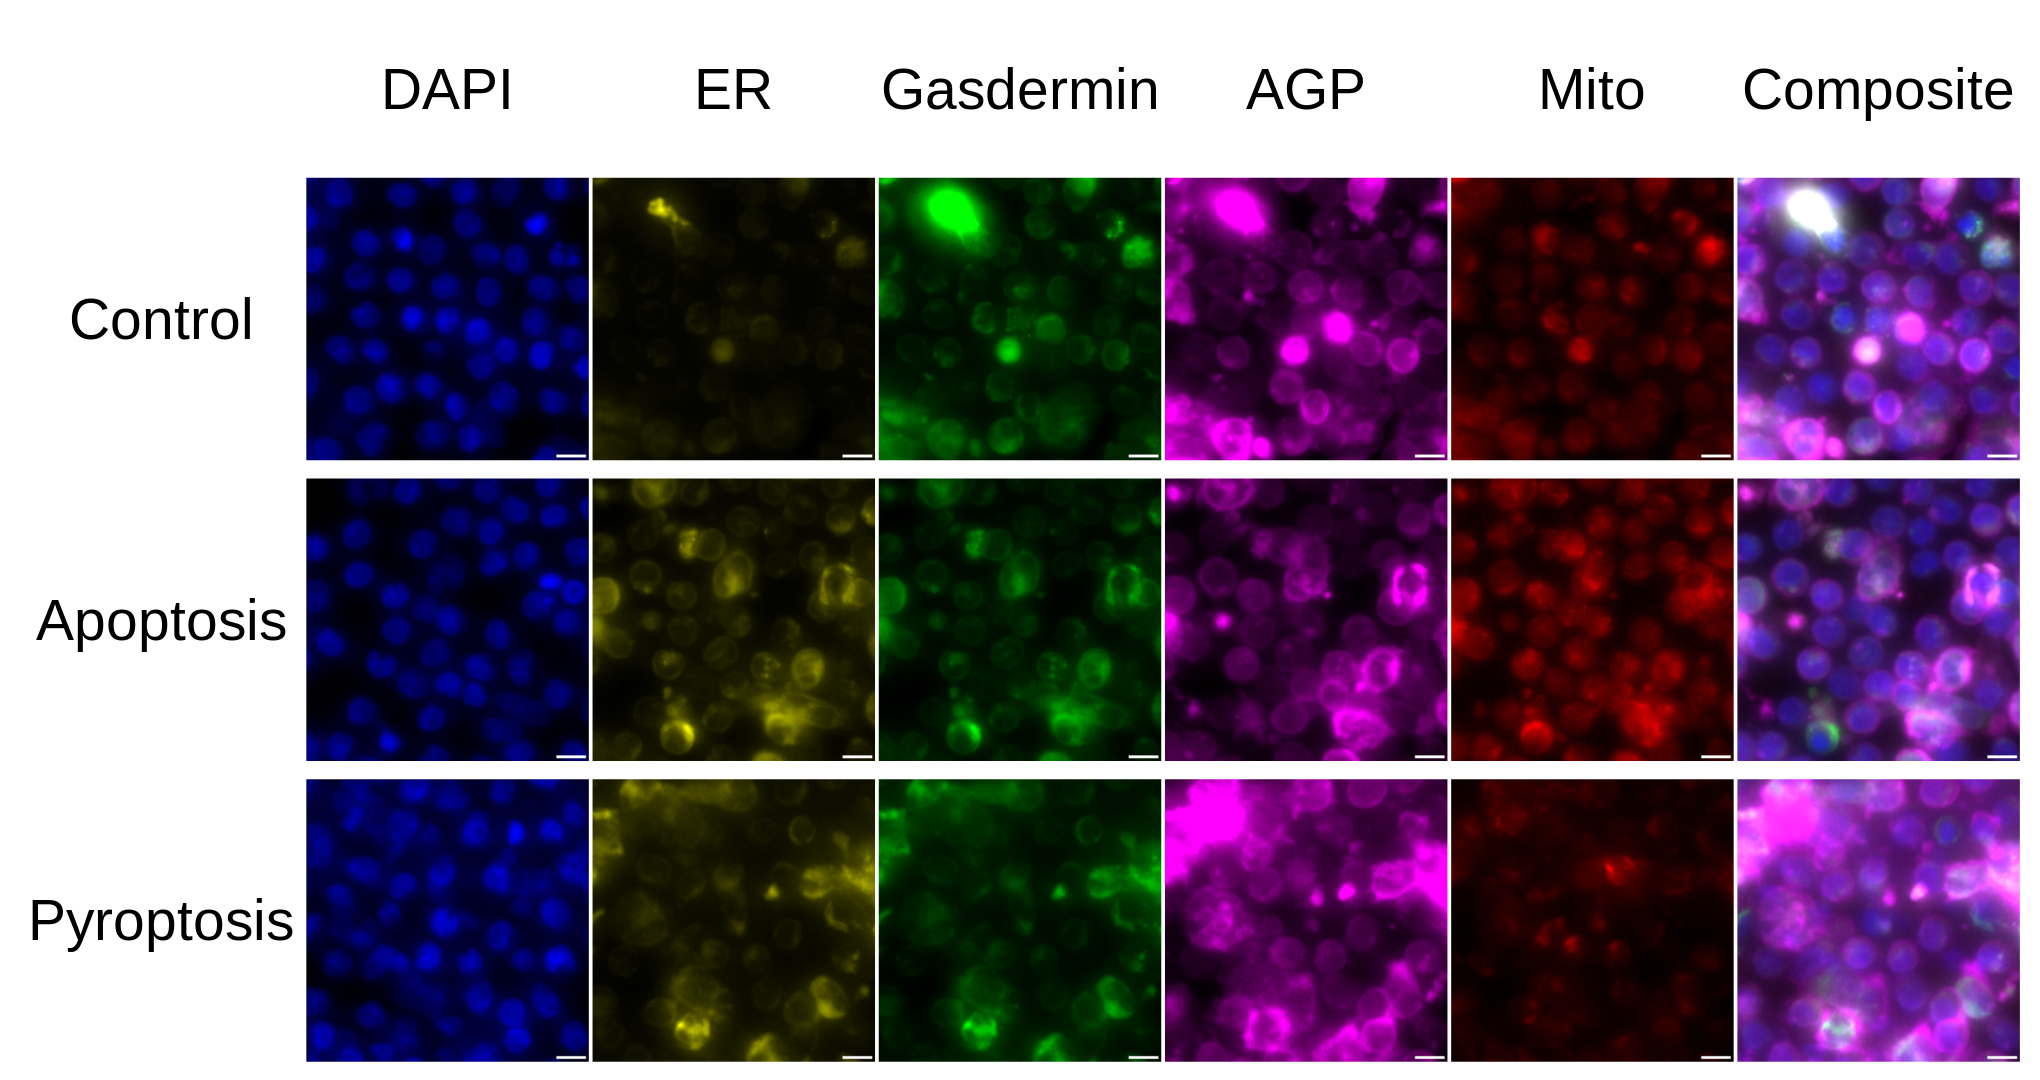

In [16]:
width <- 17
height <- 9

options(repr.plot.width = width, repr.plot.height = height)

# patch the images together
all_plot <- (
    wrap_elements(full = patch_text)
    + wrap_elements(full = control_images)
    + wrap_elements(full = apotosis_images)
    + wrap_elements(full = pyroptosis_images)
    + plot_layout(ncol = 1, widths = c(1, 1, 1, 1), heights = c(0.2, 0.4, 0.4, 0.4))
    )
all_plot

# save plot
ggsave(
    file.path(
        paste0(
            "../figures/",CELL_TYPE,"_montage.png"
        )
    ),
    all_plot, width = width, height = height, dpi = 600
)